In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input

In [4]:
def get_normalized_data():
    print("Reading in and transforming data...")
    
    
    df = pd.read_csv('C:/Users/TANNERU/Downloads/train.csv/train.csv')
    #print(df)
    data = df.values.astype(np.float32)
    #print(data)
    
    np.random.shuffle(data)
    
    
    X = data[:,1:] #except 1 columns
    Y = data[:,0].astype(np.int32) #only 1st column
    print("Innputs",X)
    print("output",Y)
    print(X.shape) #(42000, 784)
    print(Y.shape) #(42000,)
    
    
    Xtrain = X[:-1000]
    Xtest = X[-1000:]
    Ytrain = Y[:-1000]
    Ytest = Y[-1000:]
    print("Xtrain",Xtrain.shape)#(41000, 784)
    print("Xtest",Xtest.shape)#(1000, 784)
    print("Ytrain",Ytrain.shape)#(41000,)
    print("Ytest",Ytest.shape) #(1000,)
    
    
    mu = Xtrain.mean(axis = 0) #(784,)
    std = Xtrain.std(axis = 0) 
    np.place(std,std == 0,1) # changes all values to 0,1
    print(np.place(std,std == 0,1))
    #print(mu)
    print(mu.shape)#(784,)
    
    
    #center the data
    Xtrain = (Xtrain - mu)/std
    Xtest = (Xtest - mu)/std
    print(Xtrain)
    print(Xtest)
    
    
    return Xtrain,Xtest,Ytrain,Ytest

In [5]:
Xtrain,Xtest,Ytrain,Ytest = get_normalized_data()

Reading in and transforming data...
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [2 8 1 ... 8 4 2]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
None
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print("Xtrain",Xtrain.shape)#(41000, 784)
print("Xtest",Xtest.shape)#(1000, 784)
print("Ytrain",Ytrain.shape)#(41000,)
print("Ytest",Ytest.shape) #(1000,)

Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)


In [7]:
N,D = Xtrain.shape
print(N) #41000
print(D)#784

41000
784


In [8]:
K = len(set(Ytrain))
print(K) #4

10


In [9]:
print(np.unique(Ytrain))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(Ytrain)

[2 8 1 ... 7 0 1]


In [11]:
Ytrain = Ytrain.reshape(-1,1)
Ytest = Ytest.reshape(-1,1)

In [12]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
Ytrain = onehot.fit_transform(Ytrain).toarray()
Ytest = onehot.fit_transform(Ytest).toarray()

In [13]:
print(Ytrain)
print(Ytrain.shape)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(41000, 10)


In [14]:
print(Ytest)
print(Ytest.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(1000, 10)


In [17]:
# ANN with layers [784] -> [500] -> [300] -> [10]
i = Input(shape = (D,))
x = Dense(500,activation = 'relu')(i)#Hidden layer1
x = Dense(300,activation = 'relu')(x)#Hidden layer2
x = Dense(K,activation = 'softmax')(x)#output layer


In [18]:
#model 
model = Model(inputs = i,outputs = x)

In [20]:
#compiling
model.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics = ['accuracy'])

In [22]:
#fitting the model
r = model.fit(Xtrain,Ytrain,validation_data = (Xtest,Ytest),epochs = 15,batch_size = 32)
print("Fitting",r)

Train on 41000 samples, validate on 1000 samples
Epoch 1/15
41000/41000 [==============================] - 17s 411us/step - loss: 0.1116 - acc: 0.9688 - val_loss: 0.2058 - val_acc: 0.9530
Epoch 2/15
41000/41000 [==============================] - 17s 415us/step - loss: 0.0747 - acc: 0.9785 - val_loss: 0.1989 - val_acc: 0.9630
Epoch 3/15
41000/41000 [==============================] - 17s 415us/step - loss: 0.0681 - acc: 0.9809 - val_loss: 0.2573 - val_acc: 0.9530
Epoch 4/15
41000/41000 [==============================] - 17s 417us/step - loss: 0.0594 - acc: 0.9848 - val_loss: 0.2821 - val_acc: 0.9510
Epoch 5/15
41000/41000 [==============================] - 17s 415us/step - loss: 0.0636 - acc: 0.9843 - val_loss: 0.2599 - val_acc: 0.9540
Epoch 6/15
41000/41000 [==============================] - 17s 419us/step - loss: 0.0501 - acc: 0.9873 - val_loss: 0.2790 - val_acc: 0.9560
Epoch 7/15
41000/41000 [==============================] - 17s 413us/step - loss: 0.0590 - acc: 0.9868 - val_loss: 0.2

In [23]:
#keys for model
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


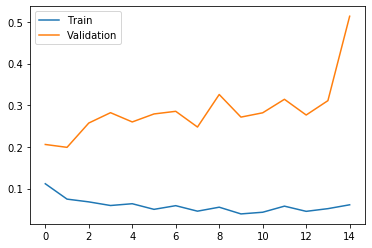

In [24]:
#visualization for loss
plt.plot(r.history['loss'],label = 'Train')
plt.plot(r.history['val_loss'],label = 'Validation')
plt.legend()
plt.show()

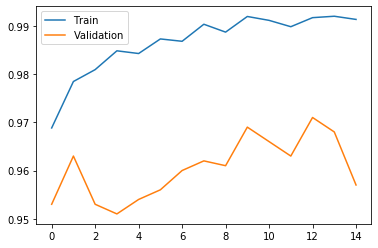

In [25]:
plt.plot(r.history['acc'],label = 'Train')
plt.plot(r.history['val_acc'],label = "Validation")
plt.legend()
plt.show()